In [1]:
# Import the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\dell\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df_whole = pd.read_csv('E:/applied ai course/coursera capstone project/Data-Collisions.csv')

C:\Users\dell\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_whole.shape


(194673, 38)

In [4]:
# check the data set summary, only 23 attributes are useful, so create a new dataframe
# 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT','SDOT_COLCODE', 'SDOT_COLDESC',
df = df_whole[['SEVERITYCODE','SEVERITYDESC', 'ADDRTYPE', 'INCDATE','INCDTTM', 'JUNCTIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND','SPEEDING', 'HITPARKEDCAR']]

df_map = df_whole[['SEVERITYCODE','ADDRTYPE','X', 'Y']]

In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   SEVERITYCODE    194673 non-null  int64 
 1   SEVERITYDESC    194673 non-null  object
 2   ADDRTYPE        192747 non-null  object
 3   INCDATE         194673 non-null  object
 4   INCDTTM         194673 non-null  object
 5   JUNCTIONTYPE    188344 non-null  object
 6   INATTENTIONIND  29805 non-null   object
 7   UNDERINFL       189789 non-null  object
 8   WEATHER         189592 non-null  object
 9   ROADCOND        189661 non-null  object
 10  LIGHTCOND       189503 non-null  object
 11  SPEEDING        9333 non-null    object
 12  HITPARKEDCAR    194673 non-null  object
dtypes: int64(1), object(12)
memory usage: 19.3+ MB


# Identify and handle missing values

identify missing data

Convert "?" to NaN In the car dataset, missing data comes with the question mark "?". We replace "?" with NaN (Not a Number), which is Python's default missing value marker, for reasons of computational speed and convenience.

In [6]:
# replace "?" to NaN
df.replace("?", np.nan, inplace = True)

C:\Users\dell\Anaconda3\lib\site-packages\pandas\core\frame.py:4384: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [7]:
df.isnull().head(6)

,SEVERITYCODE,SEVERITYDESC,ADDRTYPE,INCDATE,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,HITPARKEDCAR
0,False,False,False,False,False,False,True,False,False,False,False,True,False
1,False,False,False,False,False,False,True,False,False,False,False,True,False
2,False,False,False,False,False,False,True,False,False,False,False,True,False
3,False,False,False,False,False,False,True,False,False,False,False,True,False
4,False,False,False,False,False,False,True,False,False,False,False,True,False
5,False,False,False,False,False,False,True,False,False,False,False,True,False


In [8]:
# Evaluating for Missing Data
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("-----------------------------------")

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64
-----------------------------------
SEVERITYDESC
False    194673
Name: SEVERITYDESC, dtype: int64
-----------------------------------
ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64
-----------------------------------
INCDATE
False    194673
Name: INCDATE, dtype: int64
-----------------------------------
INCDTTM
False    194673
Name: INCDTTM, dtype: int64
-----------------------------------
JUNCTIONTYPE
False    188344
True       6329
Name: JUNCTIONTYPE, dtype: int64
-----------------------------------
INATTENTIONIND
True     164868
False     29805
Name: INATTENTIONIND, dtype: int64
-----------------------------------
UNDERINFL
False    189789
True       4884
Name: UNDERINFL, dtype: int64
-----------------------------------
WEATHER
False    189592
True       5081
Name: WEATHER, dtype: int64
-----------------------------------
ROADCOND
False    189661
True       5012
Name: ROADCOND, dtype: int64
--------

**Replace missing value by the most frequency:**

In [9]:
# which values are present in a particular column, we can use the ".value_counts()" method: df['num-of-doors'].value_counts(), use the ".idxmax()" method to calculate for us the most common type automatically: df['ADDRTYPE'].value_counts().idxmax()
df["ADDRTYPE"].replace(np.nan, df['ADDRTYPE'].value_counts().idxmax(), inplace=True)
df['ADDRTYPE'].value_counts()

C:\Users\dell\Anaconda3\lib\site-packages\pandas\core\series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Block           128852
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64

In [10]:
df["JUNCTIONTYPE"].replace(np.nan, df['JUNCTIONTYPE'].value_counts().idxmax(), inplace=True)
df["JUNCTIONTYPE"].replace("Unknown", df['JUNCTIONTYPE'].value_counts().idxmax(), inplace=True)
df["JUNCTIONTYPE"].replace("Ramp Junction", 'RampDriveway', inplace=True)
df["JUNCTIONTYPE"].replace("Driveway Junction", 'RampDriveway', inplace=True)
df["JUNCTIONTYPE"].replace("At Intersection (intersection related)", 'At-Intersection', inplace=True)
df["JUNCTIONTYPE"].replace("At Intersection (but not related to intersection)", 'At-Intersection', inplace=True)
df['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)    96138
At-Intersection                            64908
Mid-Block (but intersection related)       22790
RampDriveway                               10837
Name: JUNCTIONTYPE, dtype: int64

In [11]:
df["UNDERINFL"].replace(np.nan, df['UNDERINFL'].value_counts().idxmax(), inplace=True)
df['UNDERINFL'] = df['UNDERINFL'].map({'N': 0, '0': 0, 'Y': 1, '1': 1})
"""
df["UNDERINFL"].replace("0", "N", inplace=True)
df["UNDERINFL"].replace("1", "Y", inplace=True)
"""
df['UNDERINFL'].value_counts()


C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0    185552
1      9121
Name: UNDERINFL, dtype: int64

In [12]:
df["WEATHER"].replace(np.nan, df['WEATHER'].value_counts().idxmax(), inplace=True)
df["WEATHER"].replace("Other","Unknown",inplace=True)
df["WEATHER"].replace("Partly Cloudy","Overcast",inplace=True)
df["WEATHER"].replace("Raining","RainSnow",inplace=True)
df["WEATHER"].replace("Snowing","RainSnow",inplace=True)
df["WEATHER"].replace("Sleet/Hail/Freezing Rain","RainSnow",inplace=True)
df["WEATHER"].replace("Fog/Smog/Smoke","RainSnow",inplace=True)
df["WEATHER"].replace("Blowing Sand/Dirt","RainSnow",inplace=True)
df["WEATHER"].replace("Severe Crosswind","RainSnow",inplace=True)
df['WEATHER'].value_counts()

Clear       116216
RainSnow     34815
Overcast     27719
Unknown      15923
Name: WEATHER, dtype: int64

In [14]:
df["ROADCOND"].replace(np.nan, df['ROADCOND'].value_counts().idxmax(), inplace=True)
df["ROADCOND"].replace("Ice", "IceOilWaterSnow", inplace=True)
df["ROADCOND"].replace("Standing Water", "IceOilWaterSnow", inplace=True)
df["ROADCOND"].replace("Oil", "IceOilWaterSnow", inplace=True)
df["ROADCOND"].replace("Snow/Slush", "IceOilWaterSnow", inplace=True)
df["ROADCOND"].replace("Other", "Unknown", inplace=True)
df["ROADCOND"].replace("Sand/Mud/Dirt", "IceOilWaterSnow", inplace=True)
df['ROADCOND'].value_counts()

Dry                129522
Wet                 47474
Unknown             15210
IceOilWaterSnow      2467
Name: ROADCOND, dtype: int64

In [15]:
df["LIGHTCOND"].replace(np.nan, df['LIGHTCOND'].value_counts().idxmax(), inplace=True)
df["LIGHTCOND"].replace("Dark - No Street Lights", "Dark-No-Light", inplace=True)
df["LIGHTCOND"].replace("Dark - Street Lights Off", "Dark-No-Light", inplace=True)
df["LIGHTCOND"].replace("Dark - Unknown Lighting", "Dark-No-Light", inplace=True)
df["LIGHTCOND"].replace("Dark - Street Lights On", "Dark-With-Light", inplace=True)
df["LIGHTCOND"].replace("Other", "Unknown", inplace=True)
df["LIGHTCOND"].replace("Dusk", "DuskDawn", inplace=True)
df["LIGHTCOND"].replace("Dawn", "DuskDawn", inplace=True)
df['LIGHTCOND'].value_counts()

Daylight           121307
Dark-With-Light     48507
Unknown             13708
DuskDawn             8404
Dark-No-Light        2747
Name: LIGHTCOND, dtype: int64

In [16]:
# only has Y, so all the other value should be N
df["INATTENTIONIND"].replace(np.nan, "N", inplace=True)
df["INATTENTIONIND"].describe()

count     194673
unique         2
top            N
freq      164868
Name: INATTENTIONIND, dtype: object

In [17]:
df["SPEEDING"].replace(np.nan, "N", inplace=True)
df["SPEEDING"].describe()

C:\Users\dell\Anaconda3\lib\site-packages\pandas\core\series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


count     194673
unique         2
top            N
freq      185340
Name: SPEEDING, dtype: object

In [18]:
df["SEVERITYDESC"].describe()

count                             194673
unique                                 2
top       Property Damage Only Collision
freq                              136485
Name: SEVERITYDESC, dtype: object

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   SEVERITYCODE    194673 non-null  int64 
 1   SEVERITYDESC    194673 non-null  object
 2   ADDRTYPE        194673 non-null  object
 3   INCDATE         194673 non-null  object
 4   INCDTTM         194673 non-null  object
 5   JUNCTIONTYPE    194673 non-null  object
 6   INATTENTIONIND  194673 non-null  object
 7   UNDERINFL       194673 non-null  int64 
 8   WEATHER         194673 non-null  object
 9   ROADCOND        194673 non-null  object
 10  LIGHTCOND       194673 non-null  object
 11  SPEEDING        194673 non-null  object
 12  HITPARKEDCAR    194673 non-null  object
dtypes: int64(2), object(11)
memory usage: 19.3+ MB


In [21]:
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])
df['INCDATE'] = pd.to_datetime(df['INCDATE'])

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
df['hourofday'] = df['INCDTTM'].dt.hour
df['dayofweek'] = df['INCDTTM'].dt.dayofweek
df.head(5)

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,SEVERITYCODE,SEVERITYDESC,ADDRTYPE,INCDATE,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,HITPARKEDCAR,hourofday,dayofweek
0,2,Injury Collision,Intersection,2013-03-27 00:00:00+00:00,2013-03-27 14:54:00,At-Intersection,N,0,Overcast,Wet,Daylight,N,N,14,2
1,1,Property Damage Only Collision,Block,2006-12-20 00:00:00+00:00,2006-12-20 18:55:00,Mid-Block (not related to intersection),N,0,RainSnow,Wet,Dark-With-Light,N,N,18,2
2,1,Property Damage Only Collision,Block,2004-11-18 00:00:00+00:00,2004-11-18 10:20:00,Mid-Block (not related to intersection),N,0,Overcast,Dry,Daylight,N,N,10,3
3,1,Property Damage Only Collision,Block,2013-03-29 00:00:00+00:00,2013-03-29 09:26:00,Mid-Block (not related to intersection),N,0,Clear,Dry,Daylight,N,N,9,4
4,2,Injury Collision,Intersection,2004-01-28 00:00:00+00:00,2004-01-28 08:04:00,At-Intersection,N,0,RainSnow,Wet,Daylight,N,N,8,2


**Binning**

transforming continuous numerical variables into discrete categorical 'bins', for grouped analysis.

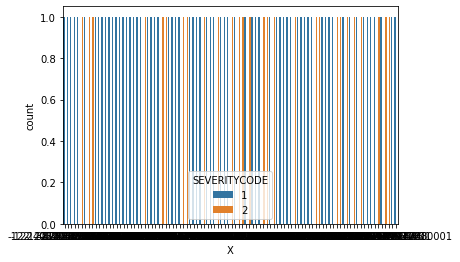

In [26]:
sns.countplot(x ="X", data= df_map.head(100), hue="SEVERITYCODE")

In [27]:
bins = np.linspace(min(df_map["X"]), max(df_map["X"]), 4)
group_names = ['Low', 'Medium', 'High']
df_map['X-binned'] = pd.cut(df_map['X'], bins, labels=group_names, include_lowest=True )
df_map[['X','X-binned']].head(10)

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,X,X-binned
0,-122.323148,Medium
1,-122.347294,Medium
2,-122.334540,Medium
3,-122.334803,Medium
4,-122.306426,Medium
5,-122.387598,Low
6,-122.338485,Medium
7,-122.320780,Medium
8,-122.335930,Medium
9,-122.384700,Low


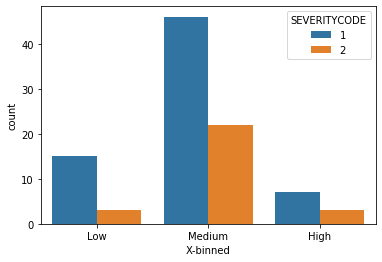

In [28]:
sns.countplot(x ="X-binned", data= df_map.head(100), hue="SEVERITYCODE")


Indicator variable (or dummy variable)

In [29]:
dummy_variable_1 = pd.get_dummies(df_map["ADDRTYPE"])
dummy_variable_1.rename(columns={'Block':'AddType-Block', 'Intersection':'AddType-Intersection'}, inplace=True)
dummy_variable_1.head()

,Alley,AddType-Block,AddType-Intersection
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,0,1


In [30]:
# merge data frame "df" and "dummy_variable_1" 
df_map = pd.concat([df_map, dummy_variable_1], axis=1)
df_map.head(5)
# drop original column "fuel-type" from "df"
# df.drop("fuel-type", axis = 1, inplace=True)

,SEVERITYCODE,ADDRTYPE,X,Y,X-binned,Alley,AddType-Block,AddType-Intersection
0,2,Intersection,-122.323148,47.703140,Medium,0,0,1
1,1,Block,-122.347294,47.647172,Medium,0,1,0
2,1,Block,-122.334540,47.607871,Medium,0,1,0
3,1,Block,-122.334803,47.604803,Medium,0,1,0
4,2,Intersection,-122.306426,47.545739,Medium,0,0,1


# Analyzing Individual Feature Patterns using Visualization

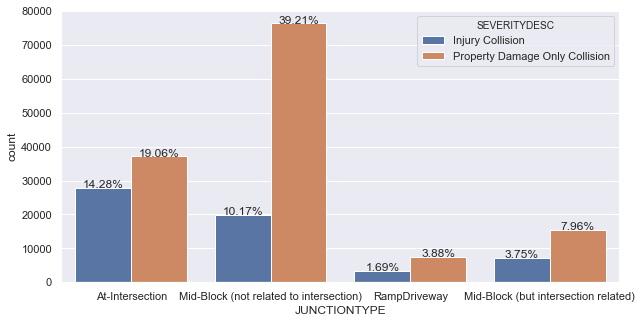

In [31]:
from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
#titanic = sns.load_dataset("titanic")
total = float(len(df)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.countplot(x="JUNCTIONTYPE", hue="SEVERITYDESC", data=df) # for Seaborn version 0.7 and more
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 5,
            '{:.2%}'.format(height/total),
            ha="center") 
show()

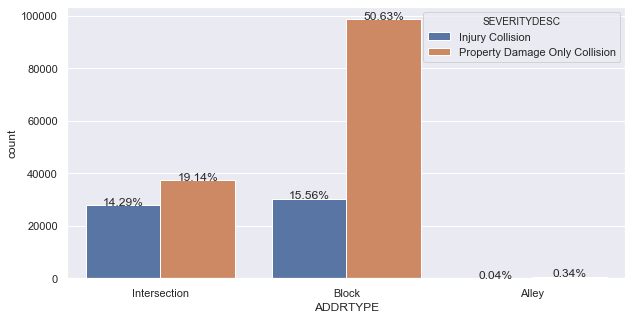

In [32]:
from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
#titanic = sns.load_dataset("titanic")
total = float(len(df)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.countplot(x="ADDRTYPE", hue="SEVERITYDESC", data=df) # for Seaborn version 0.7 and more
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:.2%}'.format(height/total),
            ha="center") 
show()

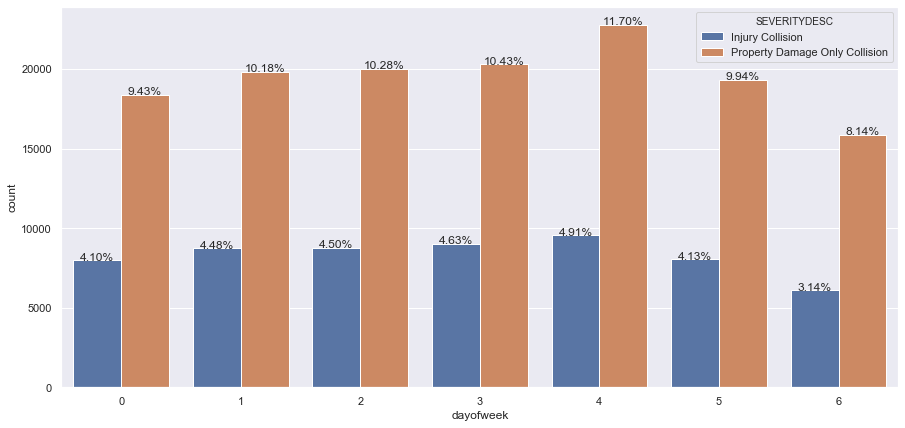

In [33]:
from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(15,7))
sns.set(style="darkgrid")
#titanic = sns.load_dataset("titanic")
total = float(len(df)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.countplot(x="dayofweek", hue="SEVERITYDESC", data=df) 
# Monday=0, Sunday=6
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


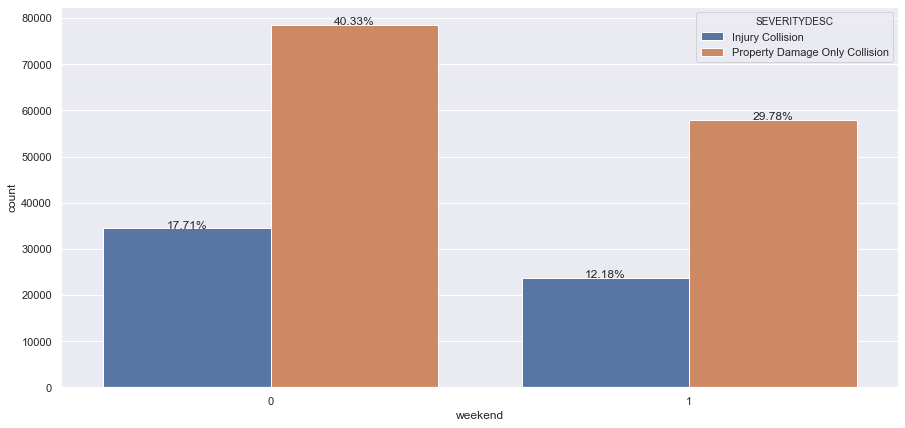

In [34]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

plt.figure(figsize=(15,7))
sns.set(style="darkgrid")
#titanic = sns.load_dataset("titanic")
total = float(len(df)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.countplot(x="weekend", hue="SEVERITYDESC", data=df) 
# Monday=0, Sunday=6
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()


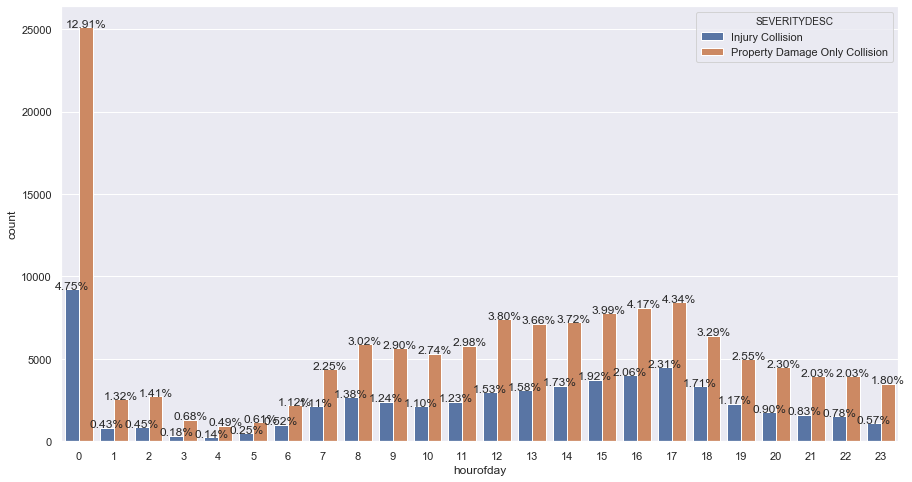

In [36]:
from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
#titanic = sns.load_dataset("titanic")
total = float(len(df)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.countplot(x="hourofday", hue="SEVERITYDESC", data=df) # for Seaborn version 0.7 and more
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


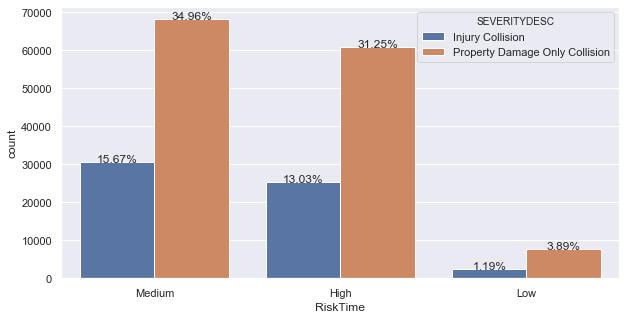

In [35]:
# High risk =1, relative ration > 3; Midum Risk = 0, for 2 > relative ration < 3; 
df['RiskTime'] = df['hourofday'].apply(lambda x: "Low" if x in (1,2,3,4) else ("Medium" if x in (5,6,7,8,9,10,11,12,13,14,15,16) else "High"))

from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
#titanic = sns.load_dataset("titanic")
total = float(len(df)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.countplot(x="RiskTime", hue="SEVERITYDESC", data=df) # for Seaborn version 0.7 and more
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()

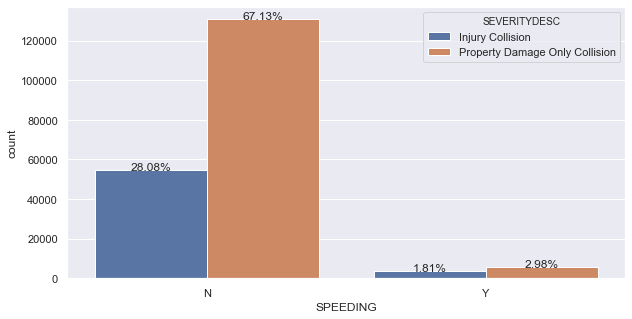

In [37]:
from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
#titanic = sns.load_dataset("titanic")
total = float(len(df)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.countplot(x="SPEEDING", hue="SEVERITYDESC", data=df) # for Seaborn version 0.7 and more
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()

Continuous numerical variables and linear relationship

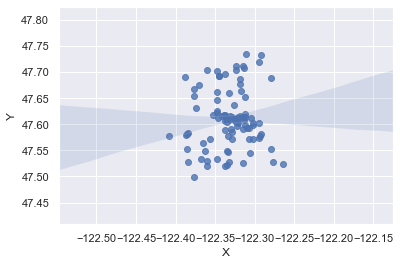

In [38]:
sns.regplot(x="X", y="Y",data=df_map.head(100), ci=80)
plt.show()

# Map - Heatmap and other Map with number

In [39]:
# use X Y to form a Piont for maping
df_map["geom"] = df_map["Y"].map(str) + "," + df_map["X"].map(str)
df_map.head()

,SEVERITYCODE,ADDRTYPE,X,Y,X-binned,Alley,AddType-Block,AddType-Intersection,geom
0,2,Intersection,-122.323148,47.703140,Medium,0,0,1,"47.70314032,-122.32314840000002"
1,1,Block,-122.347294,47.647172,Medium,0,1,0,"47.64717249,-122.3472943"
2,1,Block,-122.334540,47.607871,Medium,0,1,0,"47.60787143,-122.33453999999999"
3,1,Block,-122.334803,47.604803,Medium,0,1,0,"47.60480289,-122.3348033"
4,2,Intersection,-122.306426,47.545739,Medium,0,0,1,"47.54573946,-122.3064263"


In [50]:
# Heatmap plot
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import folium
from folium.plugins import HeatMap

# Create basic Folium Seattle map
injury_map = folium.Map(location=[47.61536892, -122.3302243], 
                       tiles = "OpenStreetMap",
                      zoom_start = 11)

# Add data for heatmp 
data_heatmap = df_map[df_map['SEVERITYCODE']==2]
data_heatmap = df_map[['Y','X']]
data_heatmap = df_map.dropna(axis=0, subset=['Y','X'])
data_heatmap = [[row['Y'],row['X']] for index, row in data_heatmap.head(10000).iterrows()] 
# why 5000? Data too large to process.
HeatMap(data_heatmap, radius=10).add_to(injury_map)

# Plot!
injury_map

In [42]:
#Folium Map
import folium
from folium import plugins

# only show the injury record, not property collision
df_map_injury = df_map[df_map['SEVERITYCODE']==2]
# Make reduced df by selecting every 50th record
reduced_df = df_map_injury.iloc [0::20, 0:]

# let's start again with a clean copy of the map of San Francisco
seattle_map = folium.Map(location=[47.61536892, -122.3302243], zoom_start=10)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(seattle_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(reduced_df.Y, reduced_df.X, reduced_df.SEVERITYCODE):
    folium.Marker(
    location=[lat, lng],
    icon=None,
    popup=label,
    ).add_to(incidents)

seattle_map.add_child(incidents)

# display map
seattle_map
#seattle_map.save("seattlemap.html")
#webbrowser.open("seattlemap.html")

ValueError: Location values cannot contain NaNs.

# Model Pre-processing: Feature selection/extraction

In [51]:
df.columns

Index(['SEVERITYCODE', 'SEVERITYDESC', 'ADDRTYPE', 'INCDATE', 'INCDTTM',
       'JUNCTIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'SPEEDING', 'HITPARKEDCAR', 'hourofday', 'dayofweek',
       'weekend', 'RiskTime'],
      dtype='object')

In [52]:
df.isnull().any()

SEVERITYCODE      False
SEVERITYDESC      False
ADDRTYPE          False
INCDATE           False
INCDTTM           False
JUNCTIONTYPE      False
INATTENTIONIND    False
UNDERINFL         False
WEATHER           False
ROADCOND          False
LIGHTCOND         False
SPEEDING          False
HITPARKEDCAR      False
hourofday         False
dayofweek         False
weekend           False
RiskTime          False
dtype: bool

In [53]:
y = df["SEVERITYCODE"]

# Feature selection

In [54]:
# convert these features to numerical values
Feature = df[['ADDRTYPE', 'JUNCTIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'SPEEDING', 'RiskTime','weekend']]
X = Feature.values
X[0:5]

array([['Intersection', 'At-Intersection', 'N', 0, 'Overcast', 'Wet',
        'Daylight', 'N', 'Medium', 0],
       ['Block', 'Mid-Block (not related to intersection)', 'N', 0,
        'RainSnow', 'Wet', 'Dark-With-Light', 'N', 'High', 0],
       ['Block', 'Mid-Block (not related to intersection)', 'N', 0,
        'Overcast', 'Dry', 'Daylight', 'N', 'Medium', 0],
       ['Block', 'Mid-Block (not related to intersection)', 'N', 0,
        'Clear', 'Dry', 'Daylight', 'N', 'Medium', 1],
       ['Intersection', 'At-Intersection', 'N', 0, 'RainSnow', 'Wet',
        'Daylight', 'N', 'Medium', 0]], dtype=object)

In [55]:
df['weekend'].value_counts()

0    112996
1     81677
Name: weekend, dtype: int64

**Convert Categorical features to numerical values**


In this case, using LabelEncoder only is not a good choice, since it brings in a natural ordering for different classes. For example, under ‘Neighborhood’ feature, class_a has value 5 but class_b has value 24, is class_b ‘greater’ than class_a? The answer is obviously no. Thus allowing model learning this result will lead to poor performance. Therefore, for dataframe containing multi class features, a further step of OneHotEncoder is needed.

In [56]:
# Categorical boolean mask
categorical_feature_mask = Feature.dtypes==object
categorical_feature_mask

ADDRTYPE           True
JUNCTIONTYPE       True
INATTENTIONIND     True
UNDERINFL         False
WEATHER            True
ROADCOND           True
LIGHTCOND          True
SPEEDING           True
RiskTime           True
weekend           False
dtype: bool

In [57]:
# filter categorical columns using mask and turn it into a list
categorical_cols = Feature.columns[categorical_feature_mask].tolist()
categorical_cols

['ADDRTYPE',
 'JUNCTIONTYPE',
 'INATTENTIONIND',
 'WEATHER',
 'ROADCOND',
 'LIGHTCOND',
 'SPEEDING',
 'RiskTime']

In [58]:
# import labelencoder LabelEncoder converts each class under specified feature to a numerical value.
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

In [59]:
# apply le on categorical feature columns
Feature[categorical_cols] = Feature[categorical_cols].apply(lambda col: le.fit_transform(col))
Feature[categorical_cols].head(10)

C:\Users\dell\Anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,ADDRTYPE,JUNCTIONTYPE,INATTENTIONIND,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,RiskTime
0,2,0,0,1,3,2,0,2
1,1,2,0,2,3,1,0,0
2,1,2,0,1,0,2,0,2
3,1,2,0,0,0,2,0,2
4,2,0,0,2,3,2,0,2
5,2,0,0,0,0,2,0,0
6,2,0,0,2,3,2,0,0
7,2,0,0,0,0,2,0,0
8,1,2,0,0,0,2,0,2
9,2,0,0,0,0,2,0,2


In [60]:
X = Feature.values
X[0:5]

array([[2, 0, 0, 0, 1, 3, 2, 0, 2, 0],
       [1, 2, 0, 0, 2, 3, 1, 0, 0, 0],
       [1, 2, 0, 0, 1, 0, 2, 0, 2, 0],
       [1, 2, 0, 0, 0, 0, 2, 0, 2, 1],
       [2, 0, 0, 0, 2, 3, 2, 0, 2, 0]], dtype=int64)

# One-Hot-Encoder or Get_Dummies to avoid over-weigh problems

In [61]:
print(Feature.shape)
dummy_Feature = pd.get_dummies(Feature)
# dummy_variable_1.rename(columns={'Block':'AddType-Block', 'Intersection':'AddType-Intersection'}, inplace=True)
print("----After Dummy Fuction------")
print(dummy_Feature.shape)
dummy_Feature.head(5)

(194673, 10)
----After Dummy Fuction------
(194673, 10)


,ADDRTYPE,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,RiskTime,weekend
0,2,0,0,0,1,3,2,0,2,0
1,1,2,0,0,2,3,1,0,0,0
2,1,2,0,0,1,0,2,0,2,0
3,1,2,0,0,0,0,2,0,2,1
4,2,0,0,0,2,3,2,0,2,0


In [62]:
X = dummy_Feature.values

# Model

In [63]:
from sklearn.model_selection import train_test_split
#Test/Train split
X_train_raw, X_test, y_train_raw, y_test = train_test_split(X, y, test_size=0.4, random_state=4)
print ('Train set:', X_train_raw.shape,  y_train_raw.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (116803, 10) (116803,)
Test set: (77870, 10) (77870,)


In [64]:
import imblearn
from imblearn.over_sampling import SMOTE

os = SMOTE (random_state=0)
X_train, y_train = os.fit_sample(X_train_raw, y_train_raw)
print ('Train set:', X_train.shape,  y_train.shape)

Train set: (163758, 10) (163758,)


In [65]:
print("----------Sample % before SMOTE--------------")
print(y_train_raw.value_counts()/len(y_train_raw))
print("----------Sample % After SMOTE --------------")
print(pd.Series(y_train).value_counts()/len(y_train))

----------Sample % before SMOTE--------------
1    0.701001
2    0.298999
Name: SEVERITYCODE, dtype: float64
----------Sample % After SMOTE --------------
2    0.5
1    0.5
Name: SEVERITYCODE, dtype: float64


# Classification

# K Nearest Neighbor(KNN)

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# Find the best K between 1 an 10
grid_params = {'n_neighbors': [i for i in range(1, 10)]}
grid = GridSearchCV(KNeighborsClassifier(),grid_params,cv = 5)
grid_results = grid.fit(X_train, y_train)

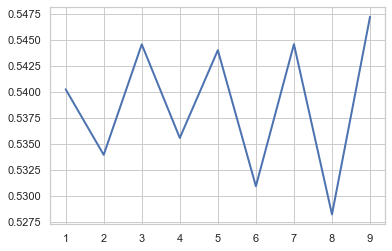

In [67]:
# visual the result of finding best K
sns.set_style("whitegrid")
sns.lineplot(grid_params['n_neighbors'], grid_results.cv_results_['mean_test_score'], palette="hls", linewidth=2)

In [68]:
print("The best n_neighbors was  : ", grid_results.best_params_['n_neighbors'])
print("The best accuracy was with:", grid_results.best_score_.round(2))

The best n_neighbors was  :  9
The best accuracy was with: 0.55


In [69]:
# using the best K (5) to model
#neigh = KNeighborsClassifier(n_neighbors = grid_results.best_params_.get('n_neighbors')).fit(X_train,y_train)
neigh = KNeighborsClassifier(n_neighbors = 6).fit(X_train,y_train)
yhat_train = neigh.predict(X_train)

In [70]:
print("KNN Accuracy     : {:.2f}".format(metrics.accuracy_score(y_train, yhat_train)))
print("KNN Jaccard index: {:.2f}".format(metrics.jaccard_score(y_train, yhat_train)))
print("KNN F1-score     : {:.2f}".format(metrics.f1_score(y_train, yhat_train, average='weighted')))

KNN Accuracy     : 0.55
KNN Jaccard index: 0.48
KNN F1-score     : 0.51


[[67706 14173]
 [59244 22635]]
              precision    recall  f1-score   support

           1       0.53      0.83      0.65     81879
           2       0.61      0.28      0.38     81879

    accuracy                           0.55    163758
   macro avg       0.57      0.55      0.51    163758
weighted avg       0.57      0.55      0.51    163758



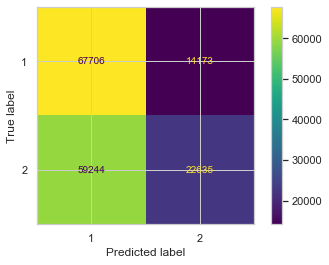

In [71]:
# Train data result: Confusion Matrix and report
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

print(confusion_matrix(y_train, yhat_train))
print(classification_report(y_train, yhat_train))

plot_confusion_matrix(neigh, X_train, y_train, include_values=True)
plt.show()

[[44801  9805]
 [17247  6017]]
              precision    recall  f1-score   support

           1       0.72      0.82      0.77     54606
           2       0.38      0.26      0.31     23264

    accuracy                           0.65     77870
   macro avg       0.55      0.54      0.54     77870
weighted avg       0.62      0.65      0.63     77870



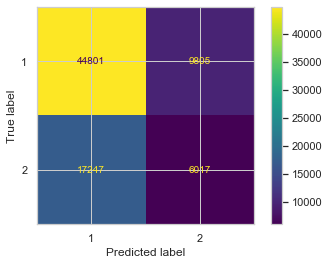

In [72]:
# Test dataset result
yhat_test = neigh.predict(X_test)

print(confusion_matrix(y_test, yhat_test))
print(classification_report(y_test, yhat_test))

plot_confusion_matrix(neigh, X_test, y_test, include_values=True)
plt.show()

# Decision Tree

The best tree_depth was:  17
The best accuracy was  :  0.6273159173902955


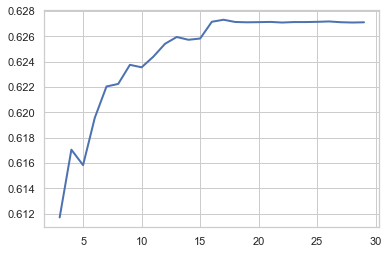

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
import matplotlib.image as mpimg

# Find the best para
tree_grid_params = {'criterion': ['entropy'], 'max_depth': [i for i in range(3,30)]}
tree_grid = GridSearchCV(tree.DecisionTreeClassifier(), tree_grid_params, cv = 3)
tree_grid_results = tree_grid.fit(X_train, y_train)

#plot the result of finding best para
sns.set_style("whitegrid")
sns.lineplot(tree_grid_params['max_depth'], tree_grid_results.cv_results_['mean_test_score'], palette="hls", linewidth=2)
print("The best tree_depth was: ",tree_grid_results.best_params_["max_depth"])
print("The best accuracy was  : ",tree_grid_results.best_score_)

In [76]:
# using the best result
carTree = DecisionTreeClassifier(criterion="entropy", max_depth = tree_grid_results.best_params_.get('max_depth'))
carTree.fit(X_train,y_train)
y_predTree = carTree.predict(X_train)

In [77]:
print("loanTree Jaccard index: {:.2f}".format(metrics.jaccard_score(y_train, y_predTree)))
print("loanTree F1-score     : {:.2f}".format(metrics.f1_score(y_train, y_predTree, average='weighted')))

loanTree Jaccard index: 0.44
loanTree F1-score     : 0.64


[[46980 34899]
 [24293 57586]]
              precision    recall  f1-score   support

           1       0.66      0.57      0.61     81879
           2       0.62      0.70      0.66     81879

    accuracy                           0.64    163758
   macro avg       0.64      0.64      0.64    163758
weighted avg       0.64      0.64      0.64    163758



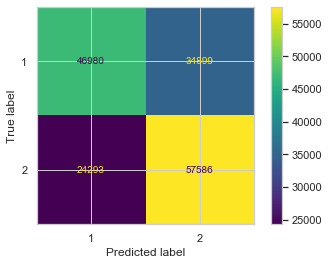

In [78]:
# # Confusion Matrix and report - Train data
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

print(confusion_matrix(y_train, y_predTree))
print(classification_report(y_train, y_predTree))

plot_confusion_matrix(carTree, X_train, y_train, include_values=True)
plt.show()

In [79]:
# # Confusion Matrix and report - Train data
y_test_predTree = carTree.predict(X_test)
print(confusion_matrix(y_test, y_test_predTree))
print(classification_report(y_test, y_test_predTree))

[[30759 23847]
 [ 7751 15513]]
              precision    recall  f1-score   support

           1       0.80      0.56      0.66     54606
           2       0.39      0.67      0.50     23264

    accuracy                           0.59     77870
   macro avg       0.60      0.62      0.58     77870
weighted avg       0.68      0.59      0.61     77870



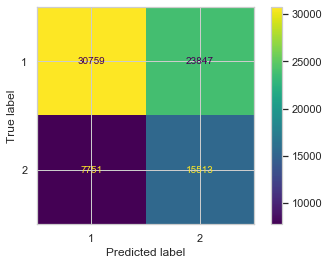

In [80]:
# Visualize the result
plot_confusion_matrix(carTree, X_test, y_test, include_values=True)
plt.show()

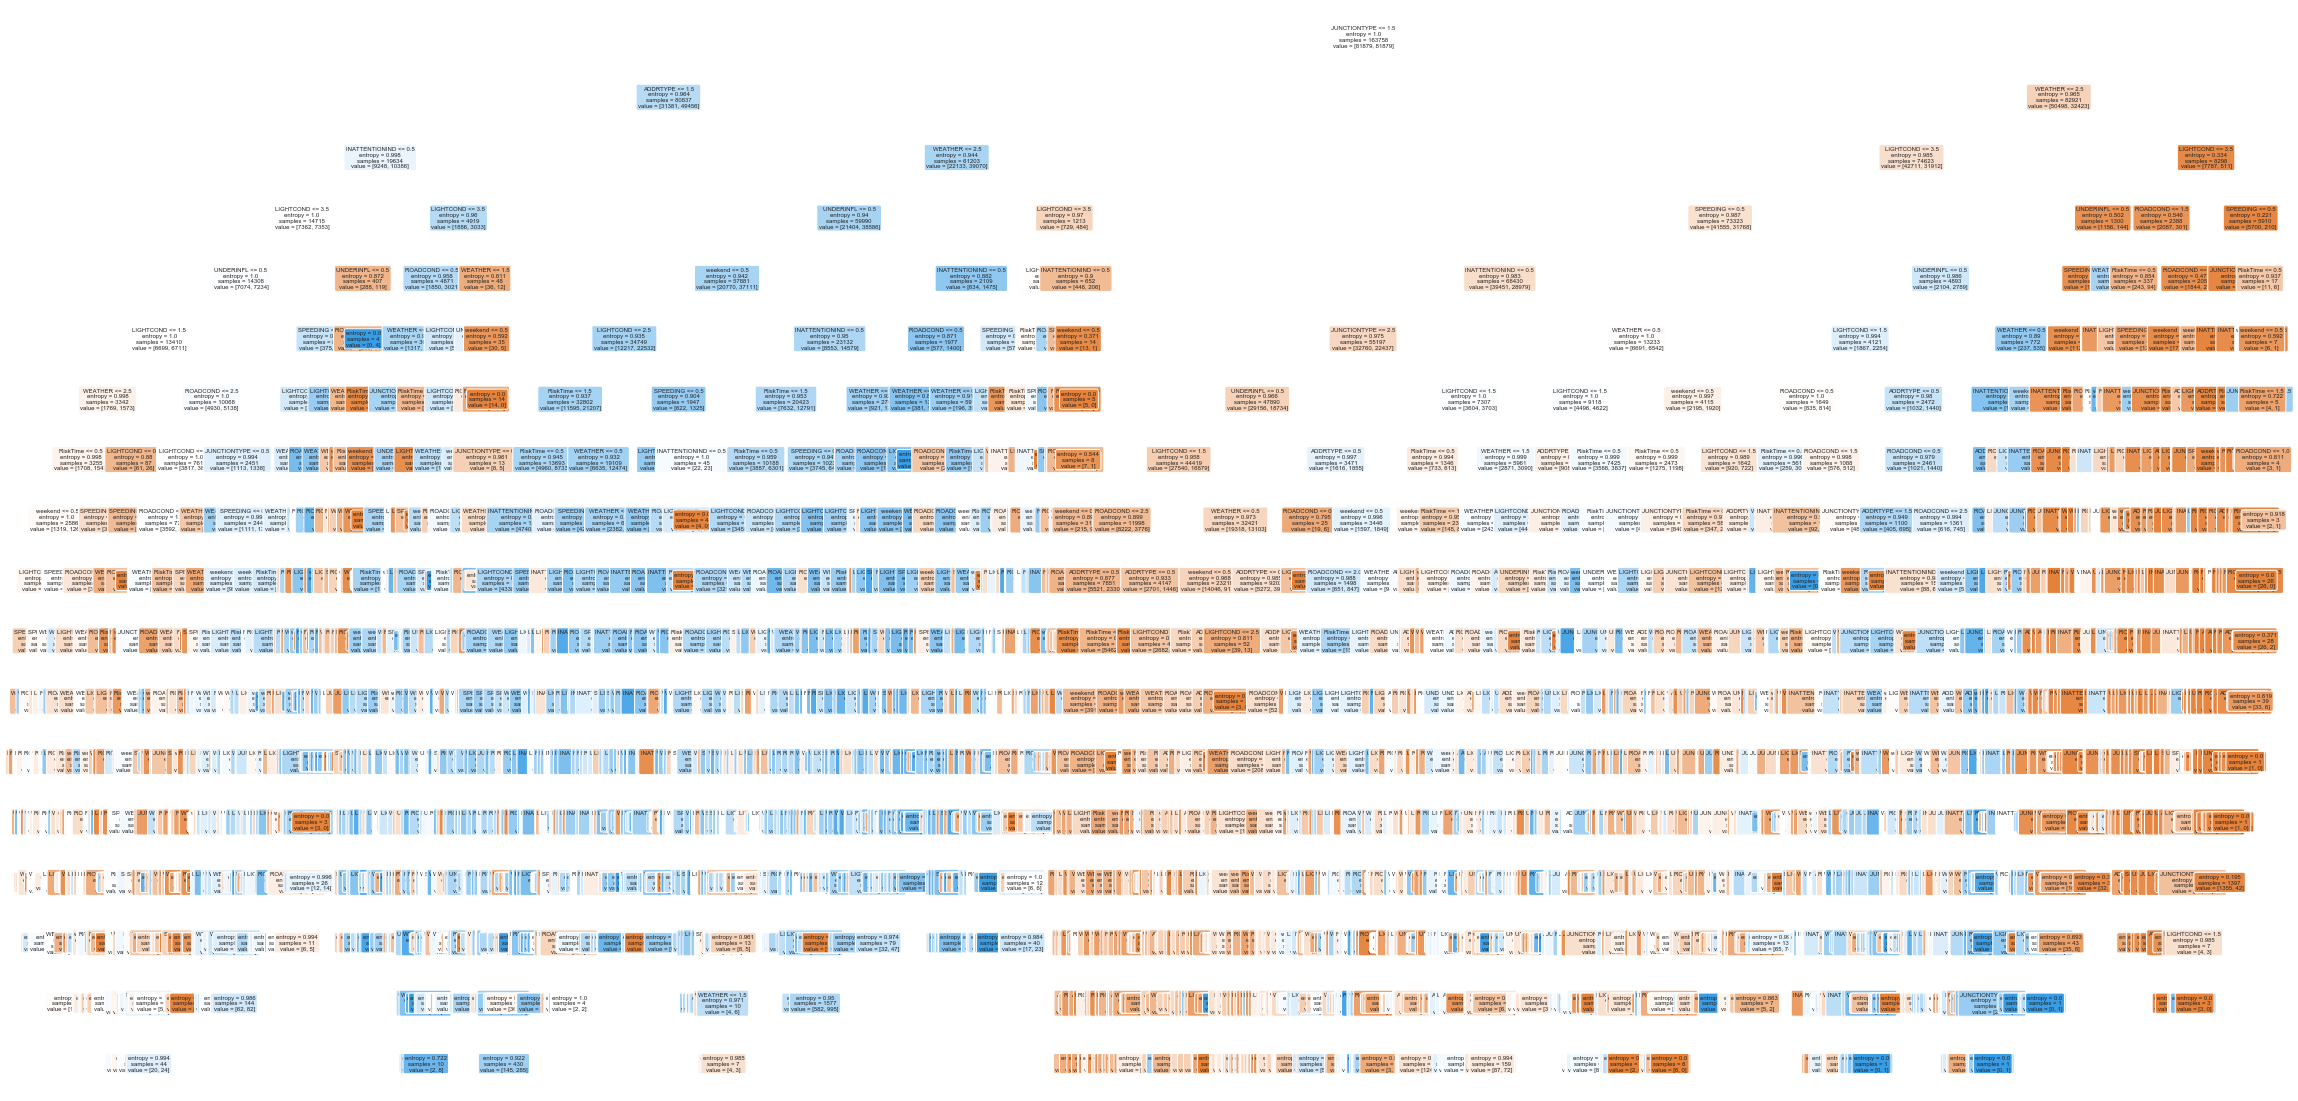

<Figure size 432x288 with 0 Axes>

In [82]:
# Visualize Decision Tree
#!pip3 install pydot
#!pip3 install graphviz
import pandas as pd
import numpy as np
from sklearn import tree
import pydot
from IPython.display import Image
#from sklearn.externals.six import StringIO

X = df[['ADDRTYPE', 'JUNCTIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'SPEEDING', 'RiskTime','weekend']]

from sklearn import tree
plt.figure(figsize=(40,20))  
_ = tree.plot_tree(carTree, feature_names = X.columns, 
             filled=True, fontsize=6, rounded = True)
plt.show()
plt.savefig('filename.png')

# Logistic Regression

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# find the best para
grid_params = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]} # l1 lasso l2 ridge
LR_grid = GridSearchCV(LogisticRegression(),grid_params,cv=3)
LR_grid.fit(X_train,y_train)

print("The best parameter was: ",LR_grid.best_params_) # {'C': 0.001, 'penalty': 'l2'}
print("The best accuracy was : ",LR_grid.best_score_)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-tes

The best parameter was:  {'C': 0.01, 'penalty': 'l2'}
The best accuracy was :  0.6142661732556577


In [94]:
# Using the best parameter to model
LR = LogisticRegression(C=0.01, solver='liblinear',penalty='l2').fit(X_train_raw,y_train_raw)
yhat_train_LR = LR.predict(X_train)
yhat_train_LR_prob = LR.predict_proba(X_train)

In [95]:
print("LR Jaccard index: {:.2f}".format(metrics.jaccard_score(y_train, yhat_train_LR)))
print("LR F1-score     : {:.2f}".format(metrics.f1_score(y_train, yhat_train_LR, average='weighted')))
print("LR Log Loss     : {:.2f}".format(metrics.log_loss(y_train, yhat_train_LR_prob)))

LR Jaccard index: 0.50
LR F1-score     : 0.39
LR Log Loss     : 0.74


[[79352  2527]
 [77211  4668]]
              precision    recall  f1-score   support

           1       0.51      0.97      0.67     81879
           2       0.65      0.06      0.10     81879

    accuracy                           0.51    163758
   macro avg       0.58      0.51      0.39    163758
weighted avg       0.58      0.51      0.39    163758



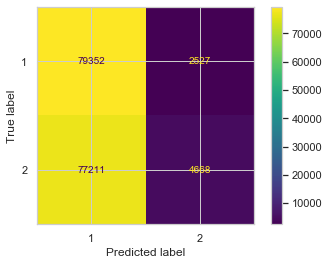

In [96]:
# # Confusion Matrix and report - Train data
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

print(confusion_matrix(y_train, yhat_train_LR))
print(classification_report(y_train, yhat_train_LR))

plot_confusion_matrix(LR, X_train, y_train, include_values=True)
plt.show()

[[52924  1682]
 [21878  1386]]
              precision    recall  f1-score   support

           1       0.71      0.97      0.82     54606
           2       0.45      0.06      0.11     23264

    accuracy                           0.70     77870
   macro avg       0.58      0.51      0.46     77870
weighted avg       0.63      0.70      0.61     77870



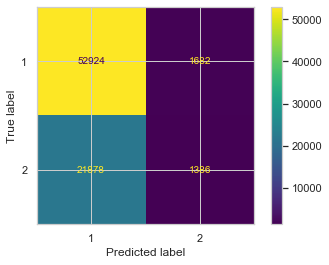

In [97]:
# # Confusion Matrix and report - Train data
yhat_test_LR = LR.predict(X_test)

print(confusion_matrix(y_test, yhat_test_LR))
print(classification_report(y_test, yhat_test_LR))

plot_confusion_matrix(LR, X_test, y_test, include_values=True)
plt.show()